Tomas Kopelson - INTRODUCCION AL PROCESAMIENTO DIGITAL DE IMAGENES - 2024

0) Librerías preliminares

In [2]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.

import warnings     # (Opcional) Es para evitar algunos mensajes de warning.
warnings.filterwarnings('ignore')

#Para realizar los graficos en la misma linea de codigo.
%matplotlib inline  

In [3]:
#Función para operaciones con matrices.
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

1) Cargar una imágen y obtener los 3 canales RGB, indicando cómo es la matriz de transformación utilizada en cada caso.

(1080, 1920, 3)


Text(0.5, 1.0, 'Imagen Original')

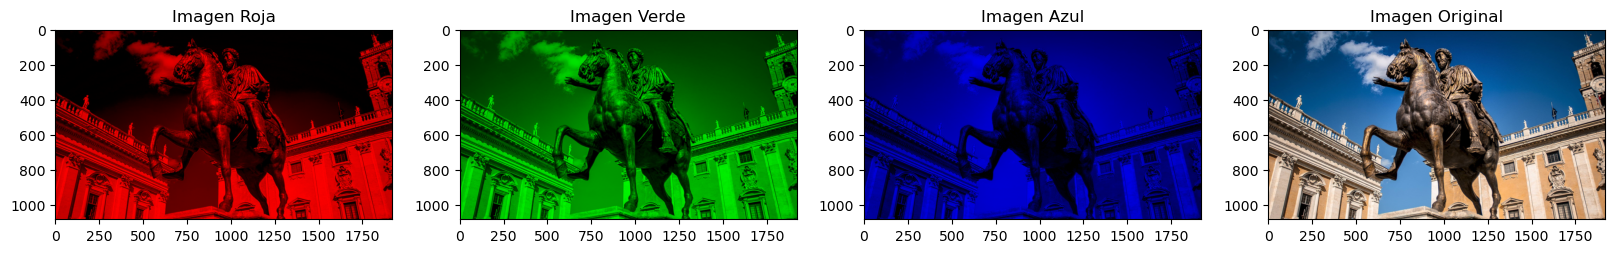

In [7]:
#Cargo una imagen
img_rgb = imageio.imread('img/marco.jpg')/255
#Mostrar imagen


print(img_rgb.shape)            #Tamaño de la imagen y capas

R = np.array([[1,0,0],          # Matrices que dividen las capas de la imagen en RGB
              [0,0,0],
              [0,0,0 ]])

G = np.array([[0,0,0],
              [0,1,0],
              [0,0,0 ]])

B = np.array([[0,0,0],
              [0,0,0],
              [0,0,1 ]])

img_red   = apply_matrix(img_rgb,R)           # Se aplican las matrices
img_green = apply_matrix(img_rgb,G)
img_blue  = apply_matrix(img_rgb,B)

fig, axes = plt.subplots(1,4,figsize=(20,10))

axes[0].imshow(np.clip(img_red, 0, 1))        # Se grafican la imagen original y las R G B
axes[0].set_title('Imagen Roja')
axes[1].imshow(np.clip(img_green, 0, 1))
axes[1].set_title('Imagen Verde')
axes[2].imshow(np.clip(img_blue, 0, 1))
axes[2].set_title('Imagen Azul')
axes[3].imshow(np.clip(img_rgb, 0, 1))
axes[3].set_title('Imagen Original')

2) Intercambiar los canales de una imágen - R con G, G con B y B con R.

Text(0.5, 1.0, 'Imagen GBR')

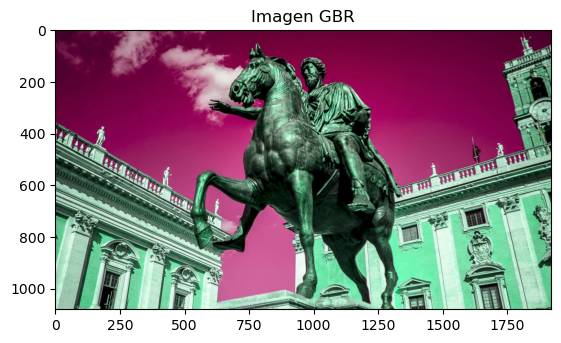

In [10]:
GBR = np.array([[0,0,1],   #     Se aplica una matriz de transformacion 
                [1,0,0],   #     que intercambia R por G, G por B y B por R 
                [0,1,0]])   

img_GBR  = apply_matrix(img_rgb,GBR)
plt.imshow(img_GBR)
plt.title('Imagen GBR')

3) Convertir una imágen RGB a YIQ. a) Modificar los canales YIQ b) Volver a convertir la imágen a RGB, y compararla con la original.

Text(0.5, 1.0, 'Variacion canal Q')

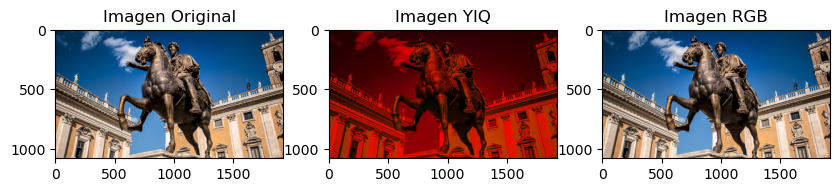

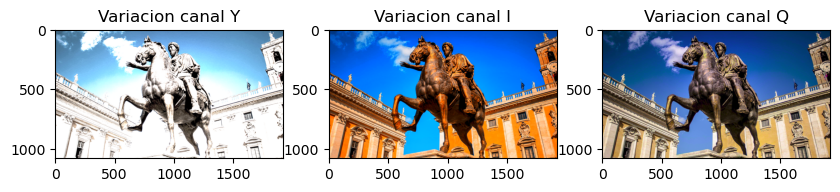

In [18]:
M_YIQ = np.array([[0.299   , 0.587    , 0.114    ], # Matriz de Transformacion RGB a YIQ
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563 , 0.6210 ],            # Matriz de Transformacion YIQ a RGB
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

Y = np.array([[3, 0, 0],                            # Matrices de variacion para los canales YIQ 
              [0, 1, 0],
              [0, 0, 1]])

I = np.array([[1, 0, 0],            
              [0, 3, 0],
              [0, 0, 1]])

Q = np.array([[1, 0, 0],            
              [0, 1, 0],
              [0, 0, 3]])

rgb_yiq = apply_matrix(img_rgb, M_YIQ)              # Se aplican las matrices de transformacion

yiq_rgb = apply_matrix(rgb_yiq, M_RGB)              # Tanto de RGB a YIQ como a la inversa

fig, axes = plt.subplots(1,3,figsize=(10,5))        # Se muestran los resultados
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen Original')
axes[1].imshow(np.clip(rgb_yiq, 0, 1))
axes[1].set_title('Imagen YIQ')
axes[2].imshow(np.clip(yiq_rgb, 0, 1))
axes[2].set_title('Imagen RGB')

Var_Y = apply_matrix(rgb_yiq, Y)                    # Se aplican las modificaciones a 
Var_Y = apply_matrix(Var_Y, M_RGB)                  # los canales YIQ 
Var_I = apply_matrix(rgb_yiq, I)                              
Var_I = apply_matrix(Var_I, M_RGB)
Var_Q = apply_matrix(rgb_yiq, Q)                             
Var_Q = apply_matrix(Var_Q, M_RGB)
    
fig, axes = plt.subplots(1,3,figsize=(10,5))       # Se muestrean las tres modificaciones independientes
axes[0].imshow(np.clip(Var_Y, 0, 1))        
axes[0].set_title('Variacion canal Y')
axes[1].imshow(np.clip(Var_I, 0, 1))
axes[1].set_title('Variacion canal I')
axes[2].imshow(np.clip(Var_Q, 0, 1))
axes[2].set_title('Variacion canal Q')